In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Non tree-based models: linear, SVM, rede reural

# Feature engineering

https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("-----------Information-----------")
print(df.info())
print("-----------Describe-----------")
print(df.describe())
print("-----------Data Types-----------")
print(df.dtypes)
print("----------Missing value-----------")
print(df.isnull().sum())
print("----------Shape of Data----------")
print(df.shape)

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----------Describe-----------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    

Features Categoricos

- É ordinal?
- Label encoding (Bom para DecisionTree, não tanto para non-DT)
- One hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

1. labelencoder (alfabetico)
2. factorize (order of appearence)
3. frequency encoding

https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(df.Embarked.dropna(axis=0))

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

In [ ]:
pd.factorize(df.Embarked)

(array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
         1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
         0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
         0, 

In [ ]:
encoding = df.groupby('Embarked').size()
encoding = encoding/len(df)

In [ ]:
df.Embarked.map(encoding)

0      0.722783
1      0.188552
2      0.722783
3      0.722783
4      0.722783
         ...   
886    0.722783
887    0.722783
888    0.722783
889    0.188552
890    0.086420
Name: Embarked, Length: 891, dtype: float64

One hot encoding (bom para non-DT, escala(0,1)

Obs.: muitos valores unicos (matriz esparsa), PCA

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
E101           3
              ..
D46            1
D28            1
A20            1
C106           1
E10            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df['Cabin'].nunique()

147

In [ ]:
pd.get_dummies(df.Pclass)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
?pd.get_dummies

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be encoded.
    If `columns` is None then all the co

In [ ]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
df['Pclass_sex'] = df['Pclass'].astype("str")+df['Sex']

0        3male
1      1female
2      3female
3      1female
4        3male
        ...   
886      2male
887    1female
888    3female
889      1male
890      3male
Length: 891, dtype: object

In [ ]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df['Nome_contem_Miss'] = df['Name'].str.contains("Miss").astype(int)
df['Nome_contem_Mrs'] = df['Name'].str.contains("Mrs").astype(int)
df['Nome_contem_Master'] = df['Name'].str.contains("Master").astype(int)
df['Nome_contem_Col'] = df['Name'].str.contains("Col").astype(int)
df['Nome_contem_Major'] = df['Name'].str.contains("Major").astype(int)
df['Nome_contem_Mr'] = df['Name'].str.contains("Mr").astype(int)

**Mean-Encoding**

![image.png](attachment:51b33e14-5fe4-4de3-b47f-457b9b7579c2.png)

![image.png](attachment:ba8ae3ae-fcfb-4682-807f-29f626973015.png)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_bin', 'Age_scaled',
       'Embarked_S', 'Embarked_C', 'Nome_contem_Miss', 'Nome_contem_Mrs',
       'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major',
       'Nome_contem_Mr'],
      dtype='object')

In [ ]:
mean = df.groupby('Pclass').Survived.mean()

In [ ]:
mean

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
df['Pclass_mean'] = df['Pclass'].map(mean)

Tomar cuidado com overfitting

![overfitting-underfitting](https://miro.medium.com/max/1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

https://github.com/jiadaizhao/Advanced-Machine-Learning-Specialization/blob/master/How%20to%20Win%20a%20Data%20Science%20Competition%20Learn%20from%20Top%20Kagglers/Week3/mean_encodings_part2.pdf

***

**Numéricos**

Sempre considerar tree-based e non-tree-based

https://medium.com/@michaelabehsera/feature-engineering-cookbook-for-machine-learning-7bf21f0bcbae

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Binarização

In [ ]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, MinMaxScaler,StandardScaler

In [ ]:
df['Age']>22.0

0      False
1       True
2       True
3       True
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [ ]:
binarizer = Binarizer(threshold=22.0)

binarizer.fit_transform(np.asarray(df['Age'].fillna(0)).reshape(-1,1))

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

Discretização - separar em intervalos contínuos - bins -binning


https://www.youtube.com/user/joshstarmer

In [ ]:
binning = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="quantile")

In [ ]:
binning.fit_transform(np.asarray(df['Age'].fillna(0)).reshape(-1,1))

array([[1.],
       [3.],
       [2.],
       [3.],
       [3.],
       [0.],
       [3.],
       [0.],
       [2.],
       [1.],
       [0.],
       [3.],
       [1.],
       [3.],
       [1.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [2.],
       [1.],
       [2.],
       [1.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [3.],
       [2.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [2.],
       [3.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [3.],
       [3.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],

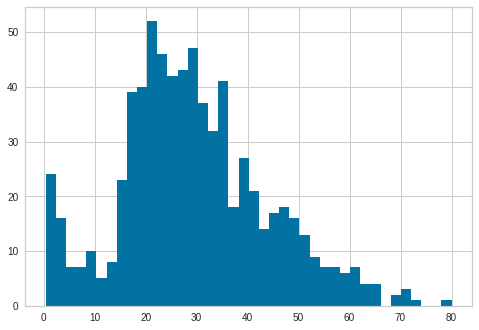

In [ ]:
plt.hist(df['Age'].dropna(axis=0),bins=40)
plt.show()

Scaling/Standardization

normalização [0,1]:

$$x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$$

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1)) # Default feature_scale é (0, 1).

minmax.fit_transform(np.asarray(df['Age'].dropna(axis=0)).reshape(-1,1))

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [0.3842674 ],
       [0.43453129],
       [0.42196532],
       [0.18321186],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [0.23347575],
       [0.49736115],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [0.03242021],
       [0.23347575],
       [0.22090978],
       [0.08268409],
       [0.25860769],
       [0.61045489],
       [0.35913546],
       [0.81151043],
       [0.25860769],
       [0.35285248],
       [0.05755215],
       [0.13294798],
       [0.27117366],
       [0.4722292 ],
       [0.560

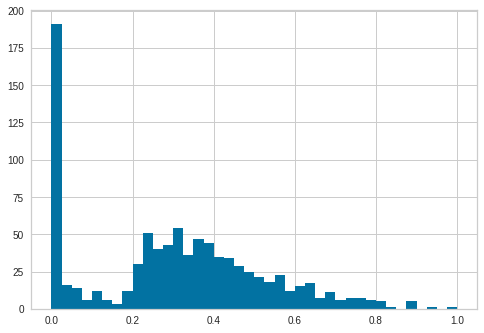

In [ ]:
plt.hist(age_minmax,bins=40)
plt.show()

padronização (media:0 std:1):

$$x_{\text{standardized}} = \frac{x - \bar{x}}{s}$$

In [ ]:
stand = StandardScaler()
stand.fit_transform(np.asarray(df['Age'].dropna()).reshape(-1,1))
#age_stand[:10]

array([[-0.53037664],
       [ 0.57183099],
       [-0.25482473],
       [ 0.36516706],
       [ 0.36516706],
       [ 1.67403863],
       [-1.90813618],
       [-0.18593675],
       [-1.08148046],
       [-1.77036023],
       [ 1.94959054],
       [-0.6681526 ],
       [ 0.64071897],
       [-1.08148046],
       [ 1.74292661],
       [-1.90813618],
       [ 0.08961515],
       [ 0.36516706],
       [ 0.29627909],
       [-1.01259248],
       [-0.11704878],
       [-1.49480832],
       [ 0.57183099],
       [-0.73704057],
       [ 0.70960695],
       [ 2.50069435],
       [-0.11704878],
       [ 0.8473829 ],
       [-0.59926462],
       [-0.80592855],
       [-1.08148046],
       [ 0.70960695],
       [-0.18593675],
       [-1.83924821],
       [-0.73704057],
       [-0.80592855],
       [-1.5636963 ],
       [-0.59926462],
       [ 1.32959874],
       [-0.0481608 ],
       [ 2.43180638],
       [-0.59926462],
       [-0.08260479],
       [-1.70147225],
       [-1.28814439],
       [-0

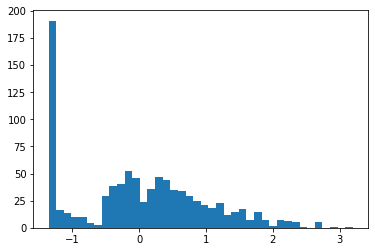

In [ ]:
plt.hist(age_stand,bins=40)
plt.show()

Rank - pode ser uma opção melhor que MinMaxScaler em caso de outlier

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html

In [ ]:
import scipy

In [ ]:
scipy.stats.rankdata(df['Age'])

array([218. , 532. , 310.5, 488.5, 488.5, 737. , 668.5,  19.5, 328.5,
        74.5,  35.5, 684. , 172. , 544.5,  74.5, 673.5,  19.5, 715. ,
       420. , 723. , 488.5, 471. ,  81. , 350. ,  52.5, 532. , 748. ,
       152. , 731. , 738. , 558. , 721. , 727. , 707. , 350. , 579. ,
       751. , 192.5, 126.5,  74.5, 558. , 328.5, 745. ,  27.5, 152. ,
       752. , 743. , 741. , 750. , 126.5,  49. , 192.5, 637.5, 374.5,
       705. , 856. , 192.5, 363.5,  42.5,  66.5, 218. , 532. , 605.5,
        35.5, 844. , 846. , 374.5, 152. , 107. , 310.5, 437.5,  92. ,
       192.5, 310.5, 437.5, 290. , 852. , 853. ,   5.5, 397. , 218. ,
       374.5, 854. , 350. , 107. , 456. ,  92. , 839. , 239. , 262.5,
       374.5, 172. , 615. , 310.5, 687.5, 830. , 711.5, 239. , 471. ,
       471. , 350. , 826. , 192.5, 456. , 523.5, 350. , 192.5, 879. ,
       532. , 883. , 621. ,  78. , 218. , 172. , 107. , 192.5, 710. ,
       374.5, 262.5,  19.5, 192.5, 875. , 447.5, 447.5, 668.5,  69. ,
       873. , 262.5,

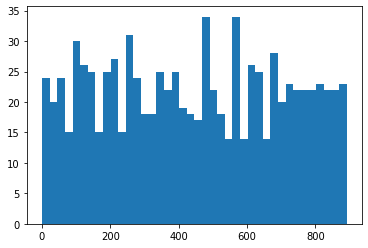

In [ ]:
plt.hist(age_rank,bins=40)
plt.show()

Log / Sqrt
obs.: consegue trazer valores grandes juntos.

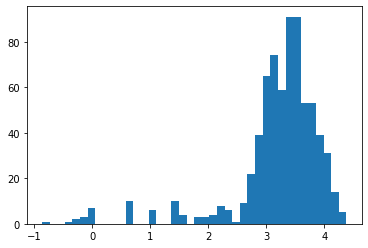

In [ ]:
plt.hist(np.log(df['Age']),bins=40)       
plt.show()

***

**Missing Values**

https://medium.com/x8-the-ai-community/handling-missing-values-in-data-54e1dc77e24f

In [ ]:
import missingno as msg

- -999,-1, 0 
- media ou mediana
- drophttps://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
- reconstruir o valor nulo
- XGboost consegue lidar com NaN
- nao imputar NaN antes de geração de novas features
- entender porque é nulo
- criar colunas indicando nulo

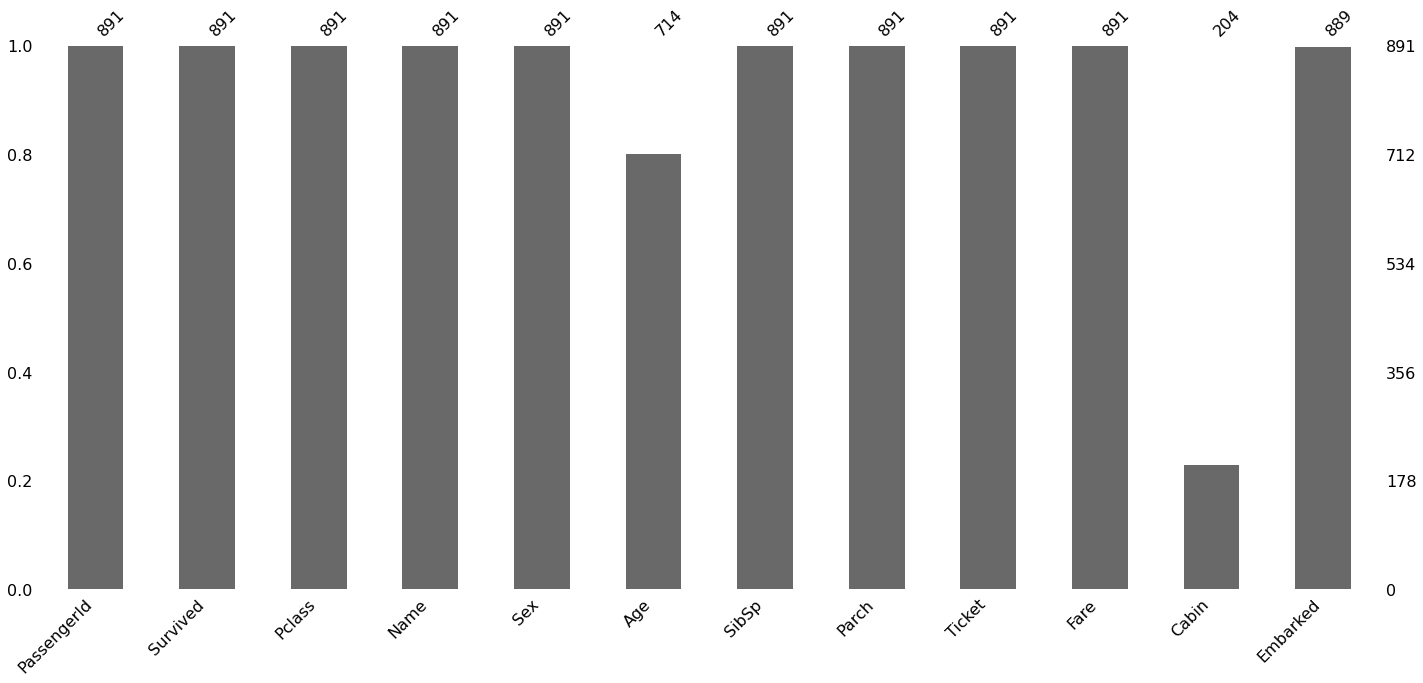

In [ ]:
msg.bar(df)

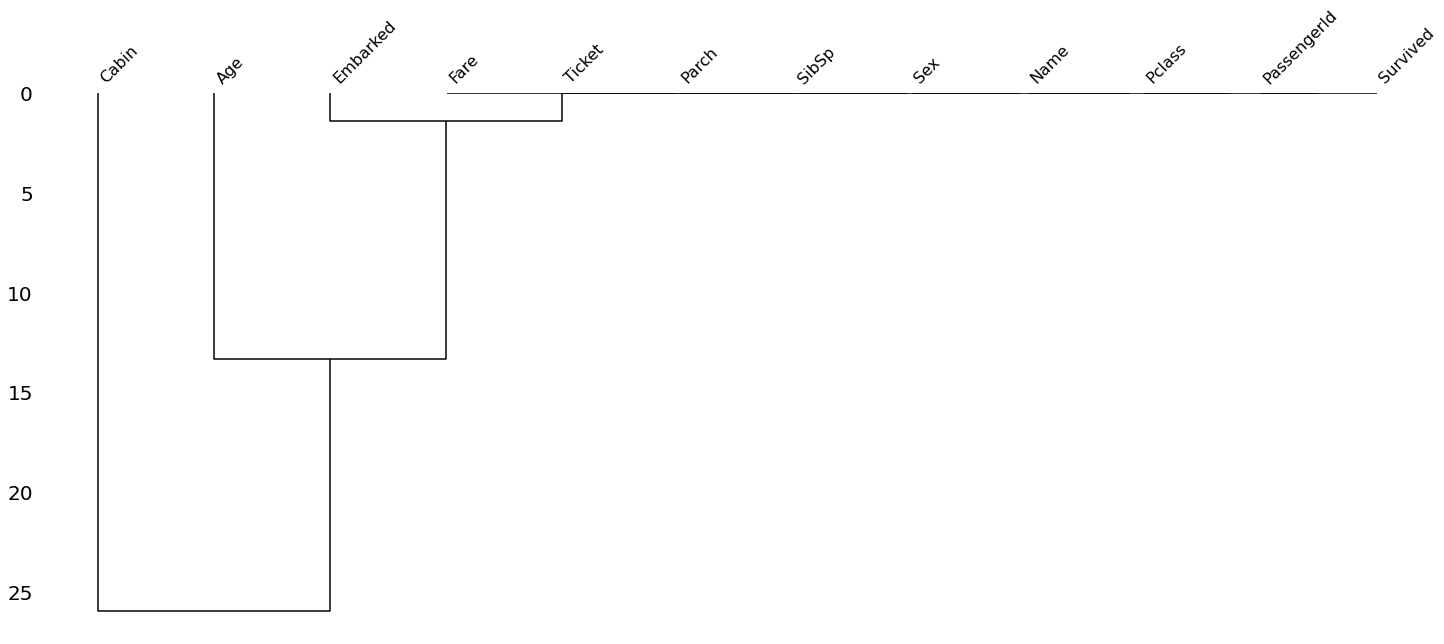

In [ ]:
msg.dendrogram(df)

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
df['Age'].fillna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    -1.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

https://scikit-learn.org/0.18/modules/generated/sklearn.preprocessing.Imputer.html

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

dica: número de nulos em uma linha

**Outliers**

https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/

Entender o outlier, pode ser erro, ou dados autênticos.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


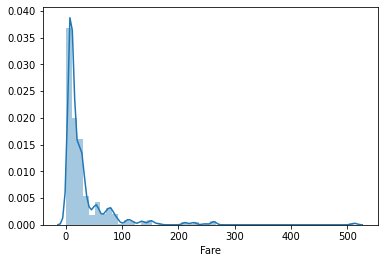

In [ ]:
sns.distplot(df['Fare'])

Oq é significa fare = 0?

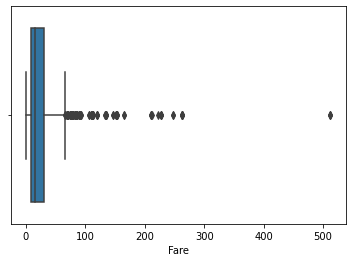

In [ ]:
sns.boxplot(df['Fare'])

In [ ]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1

valores = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]

valores

[-26.724, 65.6344]

In [ ]:
df['Fare'][(df['Fare'] < valores[0]) | (df['Fare'] > valores[1])]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

***

# Data split

https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold

- Holdout
- Kfold

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.4, random_state=0)

Stratificação?
Tenho no train e teste?
Shuffle?
- datasets pequenso
- dados desbalanceados

In [ ]:
rkfold = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state =0)
X=df.drop('Survived',axis=1)
y=['Survived']

for treino, teste in rkfold.split(X):
        
    Xtrn, Xval = X.iloc[treino], X.iloc[teste]
    ytrn, yval = y.iloc[treino], y.iloc[teste]
    
    mdl.fit(Xtrn, ytrn)
    pred = mdl.predict(Xval)
        
    precision=precision_score(yval,pred,average='macro')
        
    result.append(precision)

AttributeError: 'list' object has no attribute 'iloc'

![normal](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

# Algoritmos de ML

- Sklearn
- Vowpal Wabbit 
- XGBoost
- LightGBM
- catboost

**Modelos Lineares**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a

![normal](https://miro.medium.com/max/700/0*szXvH1a4ZQytyqhg.png)

$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1} x_{i1} + \hat{\beta}_{2} x_{i2} + \cdots + \hat{\beta}_{p} x_{ip}$$


In [ ]:
from sklearn.svm import SVC

![image.png](attachment:337b487b-8d76-47fc-ac15-a028b98920a5.png)

https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

- Tenta separar os pontos com uma reta
- Interpretaveis


![norma](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

In [ ]:
mdl = LogisticRegression()

In [ ]:
df['Sex_bin'] = le.fit_transform(df.Sex.astype('str'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Sex_bin','Age']].fillna(-1), df['Survived'], test_size=0.4, random_state=0)

In [ ]:
mdl.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predict = mdl.predict(X_test)

In [ ]:
accuracy_score(y_test,predict)

0.7787114845938375

In [ ]:
confusion_matrix(y_test,predict)

array([[187,  34],
       [ 45,  91]])

- Ridge - forma de regularizar a regressão linear (reduzir as magnitudes dos parametros aprendidos) (norma-l2)
- Lasso - outra forma de regularização (norma-l1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

![image.png](attachment:b47ea2c3-5b17-4606-bcbd-6da3937e0486.png)

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

***

**Tree Based Model**

https://www.youtube.com/watch?v=7VeUPuFGJHk

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
mdl = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [ ]:
mdl.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
predict = mdl.predict(X_test)

In [ ]:
accuracy_score(y_test,predict)

0.7787114845938375

In [ ]:
X_train.head(2)

,Sex_bin,Age,Pclass,SibSp,Parch,Fare
100,0,28.0,3,0,0,7.8958
722,1,34.0,2,0,0,13.0000


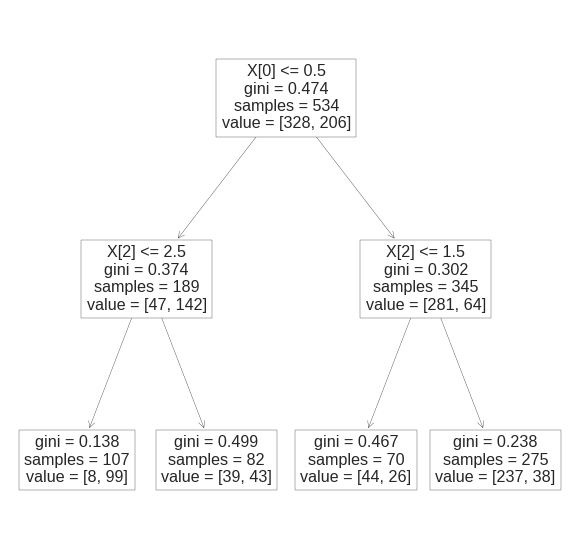

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(mdl);

In [ ]:
confusion_matrix(y_test,predict)

array([[182,  39],
       [ 51,  85]])

A árvore de decisão é considerada um método não paramétrico. Isso significa que as árvores de decisão não têm suposições sobre a distribuição de espaço e a estrutura do classificador.

![normal](https://blog.dataiku.com/hs-fs/hubfs/tree-based%20models%20image%201.png?width=600&name=tree-based%20models%20image%201.png)

![normal](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

![normal](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_001.png)

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

https://scikit-learn.org/stable/modules/tree.html

**Emsemble**

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

- combinar diferentes modelos de machine learning para melhorar a predição
1. Bagging
2. Boosting 
3. Stacking

![image.png](attachment:ad1f122b-0fc2-4360-ad6e-ee31f9c942a7.png)

**Bagging**

Bootstrapping - https://en.wikipedia.org/wiki/Bootstrap_aggregating

https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier

Média de pequenas diferenças de um mesmo modelo - paralelo

Ex: random forest

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_bin', 'Age_scaled',
       'Embarked_S', 'Embarked_C', 'Nome_contem_Miss', 'Nome_contem_Mrs',
       'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major',
       'Nome_contem_Mr', 'Pclass_mean'],
      dtype='object')

In [ ]:
features=['Sex_bin','Age','Pclass','SibSp','Parch','Fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features].fillna(-1), df['Survived'], test_size=0.4, random_state=0)

In [ ]:
mdl = RandomForestClassifier()

In [ ]:
mdl.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predict = mdl.predict(X_test)

In [ ]:
accuracy_score(y_test,predict)

0.8095238095238095

![image.png](attachment:d8990c4f-124d-4368-bb72-e8e020426572.png)

**Boosting**

![image.png](attachment:877cd0b0-550c-401a-a034-50572c581baa.png)

https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

ada - boosting de peso

xgboost, lightgbm, catboost - boosting por residuo

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
mdl = LGBMClassifier()

In [ ]:
mdl.fit(X_train,y_train)

LGBMClassifier()

In [ ]:
predict = mdl.predict(X_test)

In [ ]:
accuracy_score(y_test,predict)

0.8319327731092437

Média de pequenas diferenças de um mesmo modelo - Sequencia

Cuidado com overfitting

**Stacking**

Predição de N modelos, usando Hold-Out (base-models), e um Meta-model para treinar em cima dessas predições

![image.png](attachment:43db656a-c42e-4b92-ab03-553231a6e80f.png)

1. Treino no A, faço predição no B e no C, e guardo

![image.png](attachment:784fd63b-bbc3-48e1-b79f-b24b758303d4.png)

2. Repito isso para N modelos

![image.png](attachment:bd5a05b9-e537-4948-9f6c-1c7b660a62ba.png)

3. Treino o Meta-model em B, e faço predições em C

![image.png](attachment:dc29b386-21c2-436d-b81a-d105182f3ac6.png)

Base:

2-3: gradient boosting trees

1-2: neural nets

1-2: knn

1: svm

1-2: linear model

mudar as transformalçoes (outlier, ohe, label, mean)

Meta:
    
Simples, gradient boosting com poucas depth
Linear model com regularização

https://www.kaggle.com/dimitreoliveira/model-stacking-feature-engineering-and-eda

# Visualização e interpretabilidade

1. Lime
2. Surrogate
3. Shap
4. YellowBricks

https://www.scikit-yb.org/en/latest/index.html

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


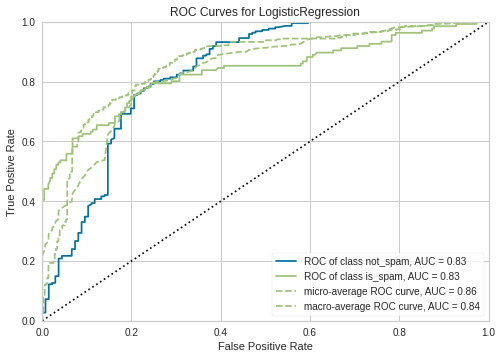

In [ ]:
from yellowbrick.classifier import ROCAUC

model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


/home/guireis/miniconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


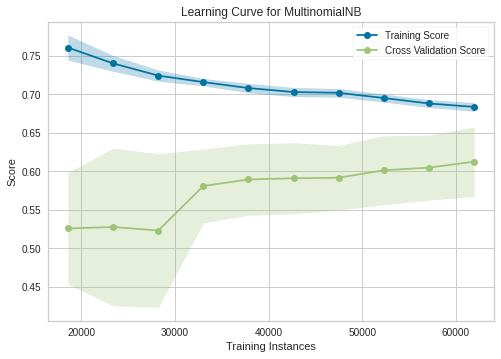

In [ ]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve


cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

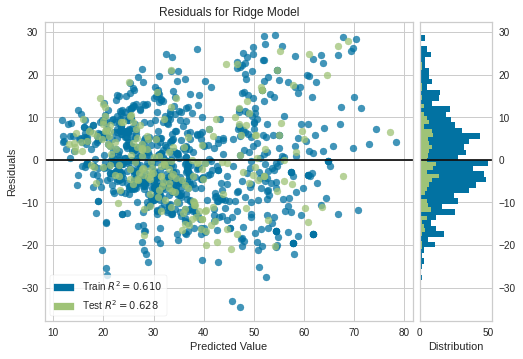

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

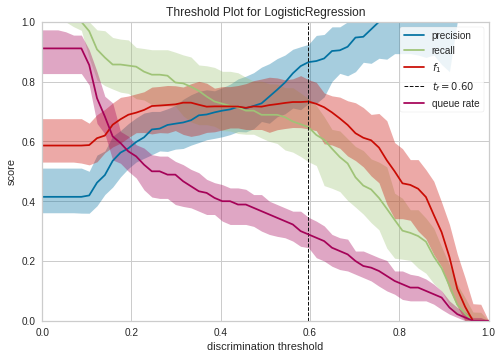

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import DiscriminationThreshold
# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(df[features].fillna(-1), df['Survived'])        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

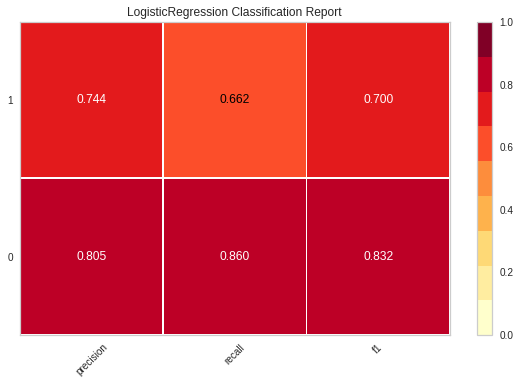

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

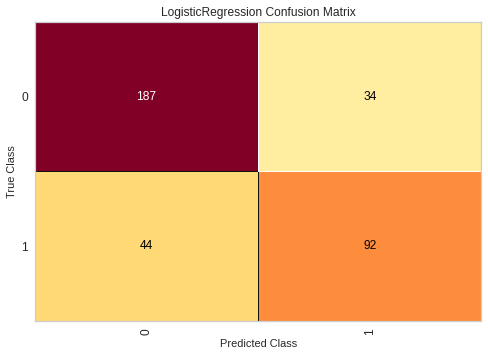

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
viz = ConfusionMatrix(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


**Intepretabilidade e explicabilidade**

https://analyticsindiamag.com/explainability-vs-interpretability-in-artificial-intelligence-and-machine-learning/

https://medium.com/analytics-vidhya/introducing-trelawney-a-unified-python-api-for-interpretation-of-machine-learning-models-6fbc0a1fd6e7

https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5

https://github.com/marcotcr/lime

https://github.com/slundberg/shap

1. Interpretação local
2. Interpretação Global

Global - Surrogate, SHAP

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(X_test)

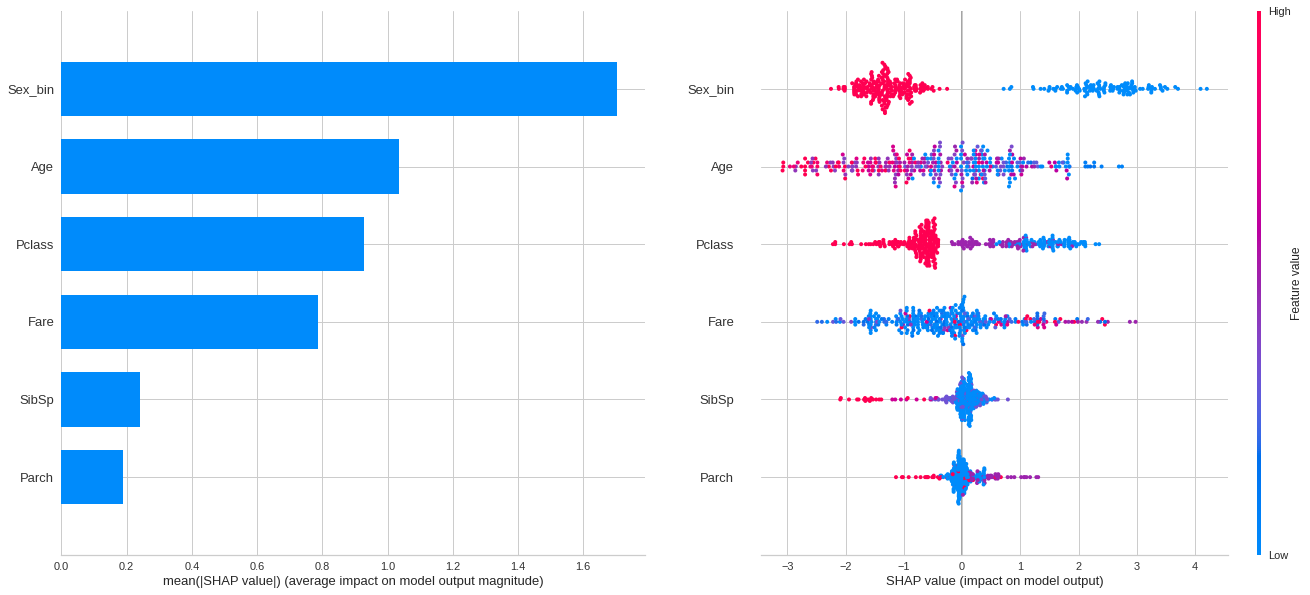

In [ ]:
plt.subplot(1,2,1)
shap.summary_plot(shap_values, X_test, plot_type="bar",alpha=0.8,show=False)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, X_test,plot_size=(23,10),show=False)
#plt.savefig('img/shap_virtual_r2_esq.png')

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])